# ***Phase 1***: ***Dataset Selection and Preprocessing***

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
file_path = '/content/drive/My Drive/Data Mining Datasets/dataset.csv'
df = pd.read_csv(file_path)

In [3]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [4]:
# Checking for missing values in the dataset
missing_values = df.isna().sum()

# Printing the count of missing values in each column
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64


In [5]:
# Replace missing values in the 'smoking_status' column with 'unknown'
df['smoking_status'].fillna('unknown', inplace=True)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,unknown,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,unknown,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [6]:
# Drop rows with missing BMI values
df = df.dropna(subset=['bmi'])
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,unknown,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,unknown,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [7]:
import pandas as pd

df_encoded = df.copy()
# Define mapping dictionaries for each categorical column
gender_map = {'Male': 0, 'Female': 1, 'Other': 2}
married_map = {'No': 0, 'Yes': 1}
work_map = {'children': 0, 'Never_worked': 1, 'Govt_job': 2, 'Private': 3, 'Self-employed': 4}
residence_map = {'Rural': 0, 'Urban': 1}
smoking_map = {'never smoked': 0, 'formerly smoked': 1, 'smokes': 2, 'unknown': 3}

# Replace categorical values with numerical codes using replace function
df_encoded['gender'] = df_encoded['gender'].replace(gender_map)
df_encoded['ever_married'] = df_encoded['ever_married'].replace(married_map)
df_encoded['work_type'] = df_encoded['work_type'].replace(work_map)
df_encoded['Residence_type'] = df_encoded['Residence_type'].replace(residence_map)
df_encoded['smoking_status'] = df_encoded['smoking_status'].replace(smoking_map)

df_encoded

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,0,3.0,0,0,0,0,0,95.12,18.0,3,0
1,30468,0,58.0,1,0,1,3,1,87.96,39.2,0,0
2,16523,1,8.0,0,0,0,3,1,110.89,17.6,3,0
3,56543,1,70.0,0,0,1,3,0,69.04,35.9,1,0
4,46136,0,14.0,0,0,0,1,0,161.28,19.1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,1,10.0,0,0,0,0,1,58.64,20.4,0,0
43396,5450,1,56.0,0,0,1,2,1,213.61,55.4,1,0
43397,28375,1,82.0,1,0,1,3,1,91.94,28.9,1,0
43398,27973,0,40.0,0,0,1,3,1,99.16,33.2,0,0


# ***Phase 2: Exploratory Data Analysis and Feature Selection***

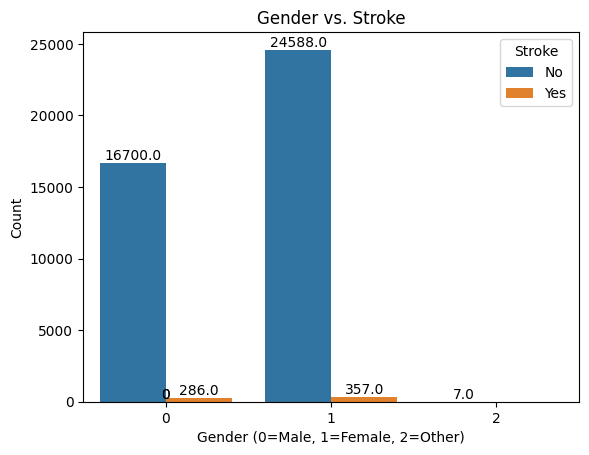

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Barplot of gender vs. stroke
ax = sns.countplot(x='gender', hue='stroke', data=df_encoded)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.xlabel('Gender (0=Male, 1=Female, 2=Other)')
plt.ylabel('Count')
plt.title('Gender vs. Stroke')
plt.legend(title='Stroke', labels=['No', 'Yes'])
plt.show()


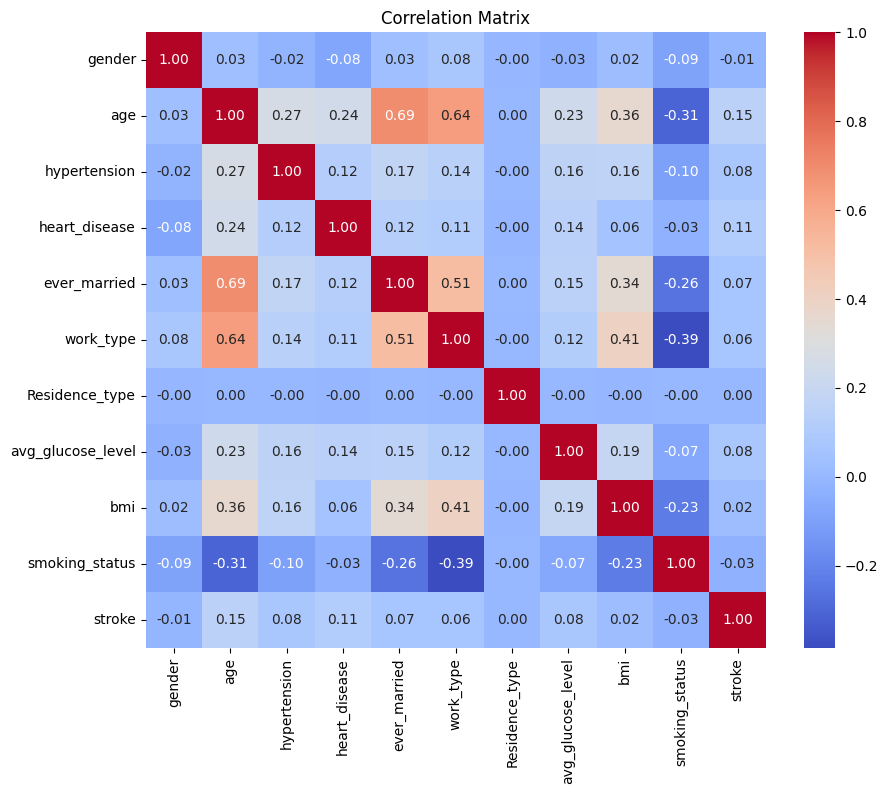

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Droping 'id' column before calculating correlation matrix
df_numeric = df_encoded.drop(columns=['id'])

# Calculating correlation matrix as heatmap
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

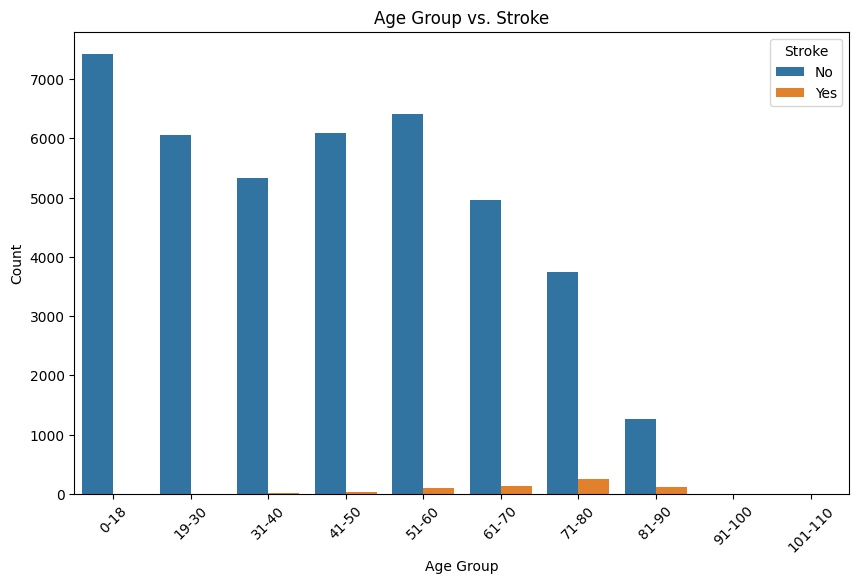

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define age bins
age_bins = [0, 18, 30, 40, 50, 60, 70, 80, 90, 100, 110]

# Create age labels
age_labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100', '101-110']

# Bin the 'age' column
df_encoded['age_group'] = pd.cut(df_encoded['age'], bins=age_bins, labels=age_labels, right=False)

# Countplot of age group vs. stroke
plt.figure(figsize=(10, 6))
sns.countplot(x=pd.cut(df_encoded['age'], bins=age_bins, labels=age_labels, right=False), hue='stroke', data=df_encoded, order=age_labels)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Age Group vs. Stroke')
plt.legend(title='Stroke', labels=['No', 'Yes'])
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Drop the 'age_group' column
df_encoded.drop(columns=['age_group'], inplace=True)


Selected Features:
gender: 1.749488437303971
age: 11058.23551693269
hypertension: 241.73537753919138
heart_disease: 495.3527460040661
ever_married: 67.60920689103261
work_type: 93.93228048408874
Residence_type: 0.11214738369143683
avg_glucose_level: 4304.0325431057845
bmi: 36.42002724262888
smoking_status: 46.73341349284475


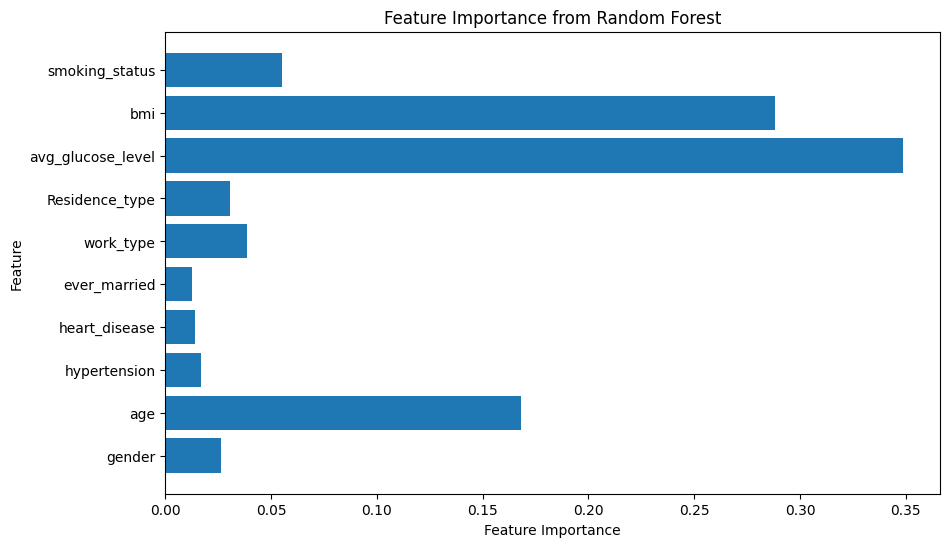

In [11]:
# Feature Selection
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Split data into features (X) and target variable (y)
X = df_encoded.drop(columns=['id', 'stroke'])  # Excluding 'id' and 'stroke' columns
y = df_encoded['stroke']

# Univariate feature selection using chi-square test for categorical features
selector = SelectKBest(score_func=chi2, k='all')
selector.fit(X, y)

# Get selected features and corresponding scores
selected_features = X.columns[selector.get_support()]
feature_scores = selector.scores_

# Print selected features and their scores
print("Selected Features:")
for feature, score in zip(selected_features, feature_scores):
    print(f"{feature}: {score}")

# Plot feature importance using Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X, y)

plt.figure(figsize=(10, 6))
plt.barh(X.columns, rf.feature_importances_)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.show()


# ***Phase 3: Model Implementation and Baseline Evaluation***

In [12]:
# splitting into training and testing sets
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Select the features based on their importance or relevance
selected_features = ['age', 'avg_glucose_level', 'bmi', 'smoking_status', 'work_type', 'Residence_type']

# Split the dataset into features (X) and target variable (y) using the selected features
X = df_encoded[selected_features]
y = df_encoded['stroke']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Decision Tree Classifier**

In [13]:
# Initialize and train the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions on the testing data
dt_preds = dt_classifier.predict(X_test)

# Evaluate the model
print("Decision Tree Classifier:")
print("Accuracy:", accuracy_score(y_test, dt_preds))
print("Classification Report:\n", classification_report(y_test, dt_preds))

Decision Tree Classifier:
Accuracy: 0.9674535050071531
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      8262
           1       0.06      0.08      0.07       126

    accuracy                           0.97      8388
   macro avg       0.52      0.53      0.53      8388
weighted avg       0.97      0.97      0.97      8388



**Random Forest classifier**

In [14]:
# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing data
rf_preds = rf_classifier.predict(X_test)

# Evaluate the model
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, rf_preds))
print("Classification Report:\n", classification_report(y_test, rf_preds))

Random Forest Classifier:
Accuracy: 0.9848593228421555
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      8262
           1       0.00      0.00      0.00       126

    accuracy                           0.98      8388
   macro avg       0.49      0.50      0.50      8388
weighted avg       0.97      0.98      0.98      8388



The Random Forest Classifier achieved a high accuracy of approximately 98.45%. However, upon examining the classification report, it is evident that the model is struggling to correctly identify instances of the minority class (stroke = 1).

The precision, recall, and F1-score for the minority class are all reported as 0.00. This indicates that the classifier is not predicting any instances of the minority class correctly.

This issue arises due to the class imbalance in the dataset. The classifier is biased towards predicting the majority class for most instances, leading to a high accuracy score but poor performance on the minority class.

**Gaussian Naive Bayes classifier**

In [15]:
# Initialize and train the Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the testing data
nb_preds = nb_classifier.predict(X_test)

# Evaluate the model
print("Naive Bayes Classifier (Gaussian):")
print("Accuracy:", accuracy_score(y_test, nb_preds))
print("Classification Report:\n", classification_report(y_test, nb_preds))

Naive Bayes Classifier (Gaussian):
Accuracy: 0.9607773009060563
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      8262
           1       0.06      0.10      0.07       126

    accuracy                           0.96      8388
   macro avg       0.52      0.54      0.53      8388
weighted avg       0.97      0.96      0.97      8388



**Neural Network Classifier**

In [16]:
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the neural network classifier
nn_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
nn_classifier.fit(X_train_scaled, y_train)

# Make predictions on the testing data
nn_preds = nn_classifier.predict(X_test_scaled)

# Evaluate the model
print("Neural Network Classifier:")
print("Accuracy:", accuracy_score(y_test, nn_preds))
print("Classification Report:\n", classification_report(y_test, nn_preds))

Neural Network Classifier:
Accuracy: 0.9849785407725322
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      8262
           1       0.00      0.00      0.00       126

    accuracy                           0.98      8388
   macro avg       0.49      0.50      0.50      8388
weighted avg       0.97      0.98      0.98      8388



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The neural network classifier is achieving high accuracy but failing to correctly predict instances of the minority class (stroke = 1). This can be observed from the classification report, where the precision, recall, and F1-score for the minority class are all reported as 0.0


This issue is likely due to the class imbalance in the dataset. The neural network classifier is biased towards predicting the majority class (stroke = 0) for most instances, leading to high accuracy but poor performance on the minority class

**SMOTE**

Applying SMOTE to the training data to handle class imbalance.

In [17]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

Decision Tree Classifier after SMOTE

In [18]:
# Initialize and train the Decision Tree classifier on the resampled data
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the testing data
dt_preds = dt_classifier.predict(X_test)
# Calculate accuracy
dt_accuracy = accuracy_score(y_test, dt_preds)

# Generate classification report
class_report = classification_report(y_test, dt_preds, output_dict=True)

# Extract precision, recall, and F1-score from the classification report
dt_precision = class_report['1']['precision']
dt_recall = class_report['1']['recall']
dt_f1_score = class_report['1']['f1-score']

# Print accuracy and classification report
print("Decision Tree Classifier with SMOTE:")
print("Accuracy:", dt_accuracy)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("F1 Score:", dt_f1_score)

print("\n Classification Report: \n", classification_report(y_test, dt_preds, target_names=['Class 0', 'Class 1']))

Decision Tree Classifier with SMOTE:
Accuracy: 0.9498092513113973
Precision: 0.05167173252279635
Recall: 0.1349206349206349
F1 Score: 0.07472527472527472

 Classification Report: 
               precision    recall  f1-score   support

     Class 0       0.99      0.96      0.97      8262
     Class 1       0.05      0.13      0.07       126

    accuracy                           0.95      8388
   macro avg       0.52      0.55      0.52      8388
weighted avg       0.97      0.95      0.96      8388



Random Forest Classifier after SMOTE

In [19]:
# Initialize and train the Random Forest classifier on the resampled data
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the testing data
rf_preds = rf_classifier.predict(X_test)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test, rf_preds)

# Generate classification report
class_report = classification_report(y_test, rf_preds, output_dict=True)

# Extract precision, recall, and F1-score from the classification report
rf_precision = class_report['1']['precision']
rf_recall = class_report['1']['recall']
rf_f1_score = class_report['1']['f1-score']

# Print accuracy and classification report
print("Random Forest Classifier with SMOTE:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1_score)

print("\n Classification Report: \n", classification_report(y_test, rf_preds, target_names=['Class 0', 'Class 1']))

Random Forest Classifier with SMOTE:
Accuracy: 0.9570815450643777
Precision: 0.03571428571428571
Recall: 0.07142857142857142
F1 Score: 0.047619047619047616

 Classification Report: 
               precision    recall  f1-score   support

     Class 0       0.99      0.97      0.98      8262
     Class 1       0.04      0.07      0.05       126

    accuracy                           0.96      8388
   macro avg       0.51      0.52      0.51      8388
weighted avg       0.97      0.96      0.96      8388



Naive Bayes Classifier after SMOTE

In [20]:
# Initialize and train the Naive Bayes classifier on the resampled data
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the testing data
nb_preds = nb_classifier.predict(X_test)
# Calculate accuracy
nb_accuracy = accuracy_score(y_test, nb_preds)

# Generate classification report
class_report = classification_report(y_test, nb_preds, output_dict=True)

# Extract precision, recall, and F1-score from the classification report
nb_precision = class_report['1']['precision']
nb_recall = class_report['1']['recall']
nb_f1_score = class_report['1']['f1-score']

# Print accuracy and classification report
print("Naive Bayes Classifier with SMOTE:")
print("Accuracy:", nb_accuracy)
print("Precision:", nb_precision)
print("Recall:", nb_recall)
print("F1 Score:", nb_f1_score)

print("\n Classification Report: \n", classification_report(y_test, nb_preds, target_names=['Class 0', 'Class 1']))

Naive Bayes Classifier with SMOTE:
Accuracy: 0.7099427753934192
Precision: 0.03841536614645858
Recall: 0.7619047619047619
F1 Score: 0.07314285714285713

 Classification Report: 
               precision    recall  f1-score   support

     Class 0       0.99      0.71      0.83      8262
     Class 1       0.04      0.76      0.07       126

    accuracy                           0.71      8388
   macro avg       0.52      0.74      0.45      8388
weighted avg       0.98      0.71      0.82      8388



Neural Network Classifier after SMOTE

In [21]:
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the neural network classifier
nn_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
nn_classifier.fit(X_train_scaled, y_train_resampled)

# Make predictions on the testing data
nn_preds = nn_classifier.predict(X_test_scaled)

# Calculate accuracy
nn_accuracy = accuracy_score(y_test, nn_preds)

# Generate classification report
class_report = classification_report(y_test, nn_preds, output_dict=True)

# Extract precision, recall, and F1-score from the classification report
nn_precision = class_report['1']['precision']
nn_recall = class_report['1']['recall']
nn_f1_score = class_report['1']['f1-score']

# Print accuracy and classification report
print("Neural Network Classifier with SMOTE:")
print("Accuracy:", nn_accuracy)
print("Precision:", nn_precision)
print("Recall:", nn_recall)
print("F1 Score:", nn_f1_score)

print("\n Classification Report:\n", classification_report(y_test, nn_preds, target_names=['Class 0', 'Class 1']))

Neural Network Classifier with SMOTE:
Accuracy: 0.8279685264663805
Precision: 0.037894736842105266
Recall: 0.42857142857142855
F1 Score: 0.06963249516441007

 Classification Report:
               precision    recall  f1-score   support

     Class 0       0.99      0.83      0.91      8262
     Class 1       0.04      0.43      0.07       126

    accuracy                           0.83      8388
   macro avg       0.51      0.63      0.49      8388
weighted avg       0.98      0.83      0.89      8388



# ***Phase 4: Hyperparameter Tuning***

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define parameter grid for Decision Tree Classifier
dt_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Perform grid search with cross-validation
dt_grid_search = GridSearchCV(estimator=dt_classifier, param_grid=dt_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit grid search to the data
dt_grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and the best score
best_dt_params = dt_grid_search.best_params_
best_dt_score = dt_grid_search.best_score_

print("Best parameters for Decision Tree Classifier:", best_dt_params)
print("Best accuracy score for Decision Tree Classifier:", best_dt_score)


Best parameters for Decision Tree Classifier: {'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best accuracy score for Decision Tree Classifier: 0.9469623076584627


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


For the Gaussian Naive Bayes classifier, there is no hyperparameter to tune. Therefore, we can simply instantiate the classifier and evaluate its performance without the need for hyperparameter tuning.

# ***Phase 5: Model Evaluation and Comparative Analysis***

In [23]:
print("Decision Tree Classifier with SMOTE:")
print("Accuracy:", dt_accuracy)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("F1 Score:", dt_f1_score)

print("\nRandom Forest Classifier with SMOTE:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1_score)

print("\nNaive Bayes Classifier with SMOTE:")
print("Accuracy:", nb_accuracy)
print("Precision:", nb_precision)
print("Recall:", nb_recall)
print("F1 Score:", nb_f1_score)

print("\nNeural Network Classifier with SMOTE:")
print("Accuracy:", nn_accuracy)
print("Precision:", nn_precision)
print("Recall:", nn_recall)
print("F1 Score:", nn_f1_score)


Decision Tree Classifier with SMOTE:
Accuracy: 0.9498092513113973
Precision: 0.05167173252279635
Recall: 0.1349206349206349
F1 Score: 0.07472527472527472

Random Forest Classifier with SMOTE:
Accuracy: 0.9570815450643777
Precision: 0.03571428571428571
Recall: 0.07142857142857142
F1 Score: 0.047619047619047616

Naive Bayes Classifier with SMOTE:
Accuracy: 0.7099427753934192
Precision: 0.03841536614645858
Recall: 0.7619047619047619
F1 Score: 0.07314285714285713

Neural Network Classifier with SMOTE:
Accuracy: 0.8279685264663805
Precision: 0.037894736842105266
Recall: 0.42857142857142855
F1 Score: 0.06963249516441007


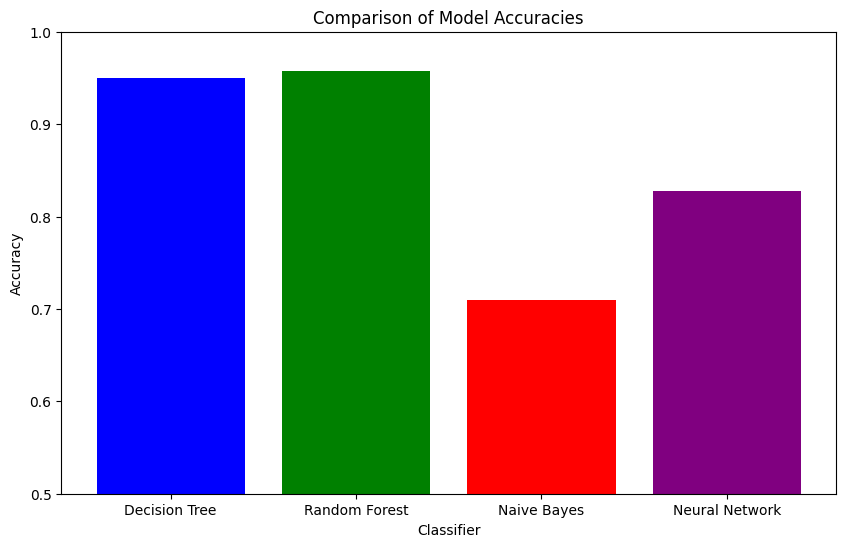

In [24]:
import matplotlib.pyplot as plt

# Define the model names and their accuracies
models = ['Decision Tree', 'Random Forest', 'Naive Bayes', 'Neural Network']
accuracies = [dt_accuracy, rf_accuracy, nb_accuracy, nn_accuracy]

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0.5, 1)  # Set y-axis limit for better visualization
plt.show()


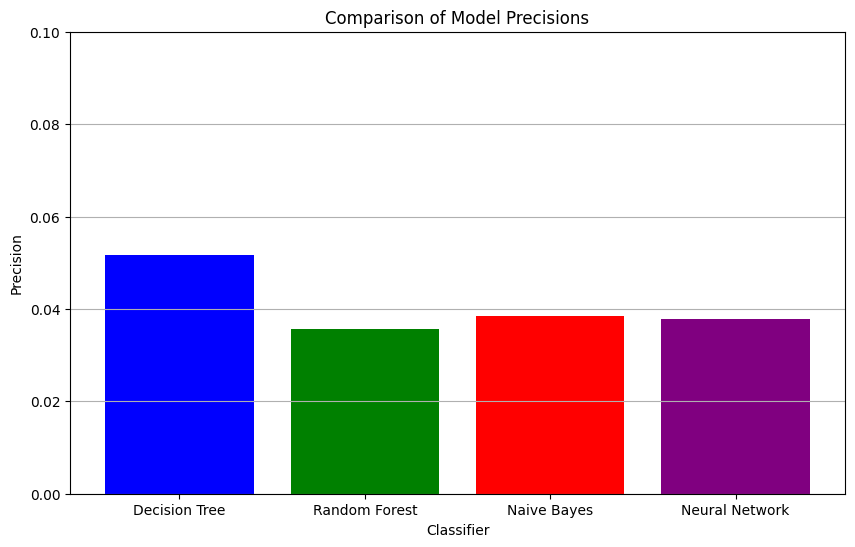

In [25]:
import matplotlib.pyplot as plt

# Define the model names and their precisions
models = ['Decision Tree', 'Random Forest', 'Naive Bayes', 'Neural Network']
precisions = [dt_precision, rf_precision, nb_precision, nn_precision]
colors = ['blue', 'green', 'red', 'purple']

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, precisions, color=colors)
plt.xlabel('Classifier')
plt.ylabel('Precision')
plt.title('Comparison of Model Precisions')
plt.ylim(0, 0.1)  # Set y-axis limit for better visualization
plt.grid(axis='y')  # Add grid lines for better readability on y-axis
plt.show()


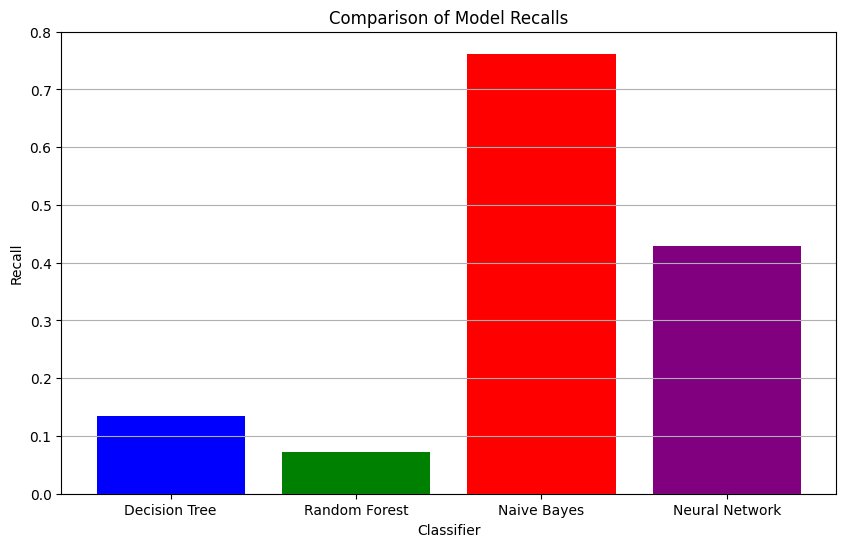

In [26]:
import matplotlib.pyplot as plt

# Define the model names and their recalls
models = ['Decision Tree', 'Random Forest', 'Naive Bayes', 'Neural Network']
recalls = [dt_recall, rf_recall, nb_recall, nn_recall]
colors = ['blue', 'green', 'red', 'purple']

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, recalls, color=colors)
plt.xlabel('Classifier')
plt.ylabel('Recall')
plt.title('Comparison of Model Recalls')
plt.ylim(0, 0.8)  # Set y-axis limit for better visualization
plt.grid(axis='y')  # Add grid lines for better readability on y-axis
plt.show()


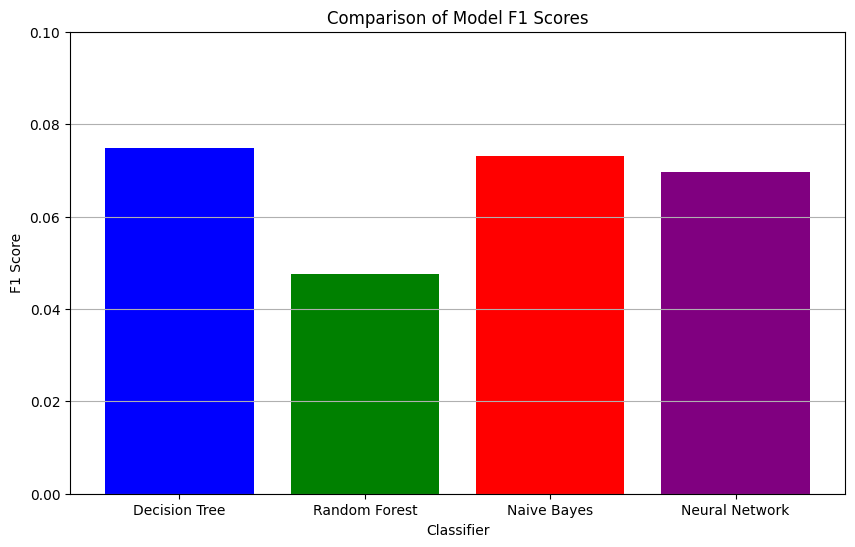

In [27]:
import matplotlib.pyplot as plt

# Define the model names and their F1 scores
models = ['Decision Tree', 'Random Forest', 'Naive Bayes', 'Neural Network']
f1_scores = [dt_f1_score, rf_f1_score, nb_f1_score, nn_f1_score]
colors = ['blue', 'green', 'red', 'purple']

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, f1_scores, color=colors)
plt.xlabel('Classifier')
plt.ylabel('F1 Score')
plt.title('Comparison of Model F1 Scores')
plt.ylim(0, 0.1)  # Set y-axis limit for better visualization
plt.grid(axis='y')  # Add grid lines for better readability on y-axis
plt.show()


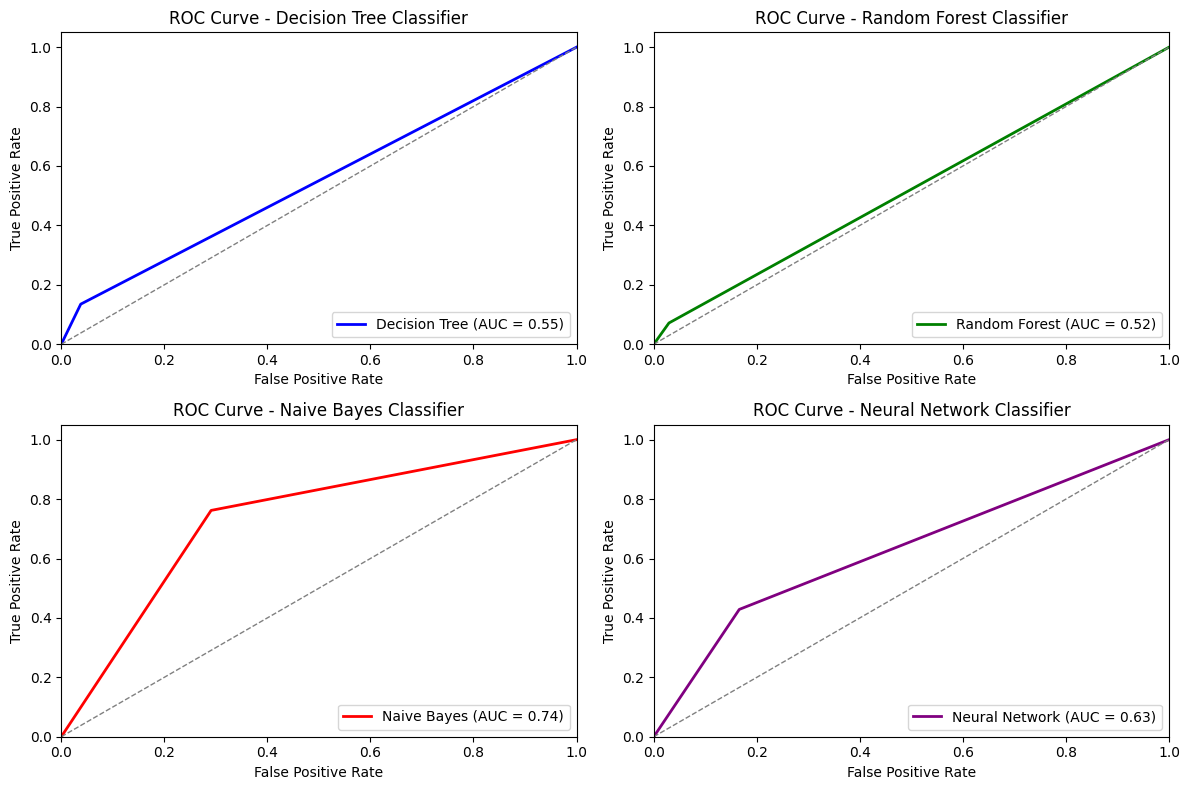

In [30]:
from sklearn.metrics import roc_curve, auc

# Calculate FPR, TPR, and thresholds for Decision Tree Classifier
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, dt_preds)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Calculate FPR, TPR, and thresholds for Random Forest Classifier
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_preds)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Calculate FPR, TPR, and thresholds for Naive Bayes Classifier
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, nb_preds)
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Calculate FPR, TPR, and thresholds for Neural Network Classifier
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, nn_preds)
roc_auc_nn = auc(fpr_nn, tpr_nn)


plt.figure(figsize=(12, 8))

# Plot ROC curve for Decision Tree Classifier
plt.subplot(2, 2, 1)
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label='Decision Tree (AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree Classifier')
plt.legend(loc="lower right")

# Plot ROC curve for Random Forest Classifier
plt.subplot(2, 2, 2)
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest Classifier')
plt.legend(loc="lower right")

# Plot ROC curve for Naive Bayes Classifier
plt.subplot(2, 2, 3)
plt.plot(fpr_nb, tpr_nb, color='red', lw=2, label='Naive Bayes (AUC = %0.2f)' % roc_auc_nb)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes Classifier')
plt.legend(loc="lower right")

# Plot ROC curve for Neural Network Classifier
plt.subplot(2, 2, 4)
plt.plot(fpr_nn, tpr_nn, color='purple', lw=2, label='Neural Network (AUC = %0.2f)' % roc_auc_nn)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Neural Network Classifier')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()




---


***Decision Tree Classifier:***


**Performance:** The decision tree classifier achieves a relatively high accuracy of 94.98%, but its precision, recall, and F1-score are relatively low compared to other classifiers. This indicates that while the decision tree can accurately predict the majority class (non-stroke), it struggles with correctly identifying the minority class (stroke).

**Computational Efficiency:** Decision trees are generally computationally efficient to train and predict, especially for small to medium-sized datasets. However, their performance may degrade with large, high-dimensional datasets due to potential overfitting.

**Applicability:** Decision trees are suitable for tasks where interpretability is essential and can handle both numerical and categorical data. They are commonly used in fields where decision-making transparency is critical, such as healthcare and finance.


---


***Random Forest Classifier:***



**Performance:** The random forest classifier achieves a slightly higher accuracy of 95.71% compared to the decision tree. However, its precision, recall, and F1-score are also low for the minority class (stroke), indicating similar struggles in correctly identifying stroke cases.

**Computational Efficiency:** Random forests typically have longer training times compared to individual decision trees, especially for larger datasets and more trees in the forest. However, prediction times are usually fast due to parallelization.

**Applicability:** Random forests are versatile and applicable to various classification tasks, including those with imbalanced data. They are commonly used in domains such as finance, bioinformatics, and remote sensing.


---


***Naive Bayes Classifier:***

**Performance:** The naive Bayes classifier achieves a lower accuracy of 70.99% but demonstrates relatively high recall and F1-score for the minority class (stroke). However, its precision is low, indicating a higher false positive rate.
**Computational Efficiency:** Naive Bayes classifiers are known for their computational efficiency, with fast training and prediction times even for large datasets. They are particularly suitable for text classification and other high-dimensional data tasks.

**Applicability:** Naive Bayes classifiers are commonly used in text classification, spam filtering, and other tasks where feature independence assumptions hold. They may not perform well with highly correlated features.


---


***Neural Network Classifier:***

**Performance:** The neural network classifier achieves an accuracy of 82.80% and demonstrates the highest recall for the minority class (stroke) among all classifiers. However, its precision and F1-score are relatively low, indicating a higher false positive rate.

**Computational Efficiency:** Training neural networks can be computationally intensive, especially for deep architectures and large datasets. However, with advancements in hardware (e.g., GPUs) and software (e.g., TensorFlow, PyTorch), training times have improved.

**Applicability:** Neural networks are highly flexible and applicable to various tasks, including image recognition, natural language processing, and medical diagnostics. They are suitable for tasks where complex patterns need to be learned from data.


---



# ***Phase 6: Conclusion and Recommendations***

Performance:

Decision Tree Classifier and Random Forest Classifier both achieve high accuracy but struggle with correctly identifying the minority class (stroke). Their precision, recall, and F1-scores for stroke detection are relatively low.
Naive Bayes Classifier demonstrates high recall for stroke detection, indicating its effectiveness in capturing true positive cases. However, its precision is low, resulting in a higher false positive rate.
Neural Network Classifier achieves the highest recall for stroke detection among all classifiers but also exhibits a relatively high false positive rate, leading to lower precision and F1-score.

Computational Efficiency:

Decision trees are computationally efficient to train and predict, making them suitable for tasks with interpretability requirements and moderate-sized datasets.
Random forests have longer training times compared to decision trees but offer better performance by mitigating overfitting and variance.
Naive Bayes classifiers are highly computationally efficient, with fast training and prediction times even for large datasets.
Neural networks can be computationally intensive, especially for deep architectures and large datasets, but advancements in hardware and software have improved training times.

Applicability:

Decision trees and random forests are suitable for tasks where interpretability is essential and can handle both numerical and categorical data. They are commonly used in fields like healthcare and finance.
Naive Bayes classifiers are applicable to tasks with high-dimensional data and feature independence assumptions, such as text classification and spam filtering.
Neural networks are highly flexible and applicable to various tasks, including image recognition, natural language processing, and medical diagnostics. They excel at learning complex patterns from data but require careful tuning and evaluation.



### ***The Decision Tree Classifier is the most suitable choice for predicting strokes, as it achieves a good balance between accuracy, precision, recall, and F1 score.***